<a href="https://colab.research.google.com/github/a-emreusta/success-of-ai-writers/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_train = pd.read_csv("/content/drive/MyDrive/Success of AI Writers/DATA/snli_1.0_train.csv")
df_val=pd.read_csv("/content/drive/MyDrive/Success of AI Writers/DATA/snli_1.0_dev.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Success of AI Writers/DATA/snli_1.0_test.csv")

In [4]:
df_test.shape

(10000, 3)

In [5]:
df_train.shape

(550152, 3)

In [6]:
df_val.shape

(10000, 3)

In [20]:
data=[]
for i in range(0,df_train.shape[0],3):
  data.append(len(df_train.iloc[i].sentence1))

In [21]:
df=pd.DataFrame(data)

In [22]:
df.describe()

,0
count,183384.000000
mean,66.341317
std,29.618987
min,3.000000
25%,46.000000
50%,60.000000
75%,81.000000
max,425.000000


In [71]:
df_train_1=[]
for i in range(0,df_train.shape[0],3):
  if len(df_train.iloc[i].sentence1)>80:
    df_train_1.append([df_train.iloc[i].similarity,df_train.iloc[i].sentence1,df_train.iloc[i].sentence2])
    df_train_1.append([df_train.iloc[i+1].similarity,df_train.iloc[i+1].sentence1,df_train.iloc[i+1].sentence2])
    df_train_1.append([df_train.iloc[i+2].similarity,df_train.iloc[i+2].sentence1,df_train.iloc[i+2].sentence2])

In [72]:
df_train_= pd.DataFrame(df_train_1)

In [73]:
df_train_.shape

(137364, 3)

In [74]:
df_train_.columns=["similarity","sentence1","sentence2"]

In [75]:
df_train_.head()

,similarity,sentence1,sentence2
0,neutral,An older man sits with his orange juice at a s...,An older man drinks his juice as he waits for ...
1,contradiction,An older man sits with his orange juice at a s...,A boy flips a burger.
2,neutral,An older man sits with his orange juice at a s...,An elderly man sits in a small shop.
3,neutral,"A man with blond-hair, and a brown shirt drink...",A blond man getting a drink of water from a fo...
4,contradiction,"A man with blond-hair, and a brown shirt drink...",A blond man wearing a brown shirt is reading a...


In [ ]:
df_train.head()

,similarity,sentence1,sentence2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,neutral,Children smiling and waving at camera,They are smiling at their parents
4,entailment,Children smiling and waving at camera,There are children present


In [ ]:
df_val.head()

,similarity,sentence1,sentence2
0,neutral,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...
1,entailment,Two women are embracing while holding to go pa...,Two woman are holding packages.
2,contradiction,Two women are embracing while holding to go pa...,The men are fighting outside a deli.
3,entailment,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.
4,neutral,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.


In [ ]:
df_test.head()

,similarity,sentence1,sentence2
0,neutral,This church choir sings to the masses as they ...,The church has cracks in the ceiling.
1,entailment,This church choir sings to the masses as they ...,The church is filled with song.
2,contradiction,This church choir sings to the masses as they ...,A choir singing at a baseball game.
3,neutral,"A woman with a green headscarf, blue shirt and...",The woman is young.
4,entailment,"A woman with a green headscarf, blue shirt and...",The woman is very happy.


In [ ]:
print(f"Sentence1: {df_train.loc[1, 'sentence1']}")
print(f"Sentence2: {df_train.loc[1, 'sentence2']}")
print(f"Similarity: {df_train.loc[1, 'similarity']}")

Sentence1: A person on a horse jumps over a broken down airplane.
Sentence2: A person is at a diner, ordering an omelette.
Similarity: contradiction


In [ ]:
print("Number of missing values for train data")
print(df_train.isnull().sum())

Number of missing values for train data
similarity    0
sentence1     0
sentence2     6
dtype: int64


In [58]:
print("Number of missing values for train_ data")
print(df_train_.isnull().sum())

Number of missing values for train_ data
0    0
1    0
2    0
dtype: int64


In [59]:
df_train.dropna(axis=0,inplace=True)
df_train_.dropna(axis=0,inplace=True)

In [60]:
print("Number of missing values for train data")
print(df_train_.isnull().sum())

Number of missing values for train data
0    0
1    0
2    0
dtype: int64


In [ ]:
print("Number of missing values for validation data")
print(df_val.isnull().sum())

Number of missing values for validation data
similarity    0
sentence1     0
sentence2     0
dtype: int64


In [ ]:
print("Number of missing values for test data")
print(df_test.isnull().sum())

Number of missing values for test data
similarity    0
sentence1     0
sentence2     0
dtype: int64


In [62]:
print("Train Target Distribution")
print(df_train.similarity.value_counts())

Train Target Distribution
entailment       183414
contradiction    183185
neutral          182762
-                   785
Name: similarity, dtype: int64


In [ ]:
print("Validation Target Distribution")
print(df_val.similarity.value_counts())

Validation Target Distribution
entailment       3329
contradiction    3278
neutral          3235
-                 158
Name: similarity, dtype: int64


In [ ]:
print("Validation Test Data Distribution")
print(df_test.similarity.value_counts())

Validation Test Data Distribution
entailment       3368
contradiction    3237
neutral          3219
-                 176
Name: similarity, dtype: int64


In [76]:
df_train=df_train[df_train.similarity!="-"].reset_index().drop("index",axis=1)
df_val=df_val[df_val.similarity!="-"].reset_index().drop("index",axis=1)
df_test=df_test[df_test.similarity!="-"].reset_index().drop("index",axis=1)
df_train_=df_train_[df_train_.similarity!="-"].reset_index().drop("index",axis=1)

In [77]:
print("Distribution of our train targets")
print(df_train_.similarity.value_counts())

Distribution of our train targets
entailment       45930
contradiction    45732
neutral          45702
Name: similarity, dtype: int64


In [ ]:
print("Distribution of our validation targets")
print(df_val.similarity.value_counts())

Distribution of our validation targets
entailment       3329
contradiction    3278
neutral          3235
Name: similarity, dtype: int64


In [ ]:
print("Validation Test Data Distribution")
print(df_test.similarity.value_counts())

Validation Test Data Distribution
entailment       3368
contradiction    3237
neutral          3219
Name: similarity, dtype: int64


In [ ]:
df_train.describe()

,similarity,sentence1,sentence2
count,549361,549361,549361
unique,3,150772,479422
top,entailment,A dog in a field.,A man is sleeping.
freq,183414,33,335


In [ ]:
df_val.describe()

,similarity,sentence1,sentence2
count,9842,9842,9842
unique,3,3319,9667
top,entailment,"A lone, 2-3 year old blond child in a blue jac...",People are outside.
freq,3329,6,6


In [82]:
df_train_.describe()

,similarity,sentence1,sentence2
count,137364,137364,137364
unique,3,43413,128179
top,entailment,"If the animal jumps out of the vehicle, or the...",There are multiple people present.
freq,45930,28,86


In [ ]:
df_test.describe()

,similarity,sentence1,sentence2
count,9824,9824,9824
unique,3,3323,9639
top,entailment,A boy in a yellow t-shirt and pink sweater tal...,The man is outside.
freq,3368,6,7


In [ ]:
df=pd.concat([df_train,df_val,df_test],ignore_index=True)

In [ ]:
df.head()

,similarity,sentence1,sentence2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,neutral,Children smiling and waving at camera,They are smiling at their parents
4,entailment,Children smiling and waving at camera,There are children present


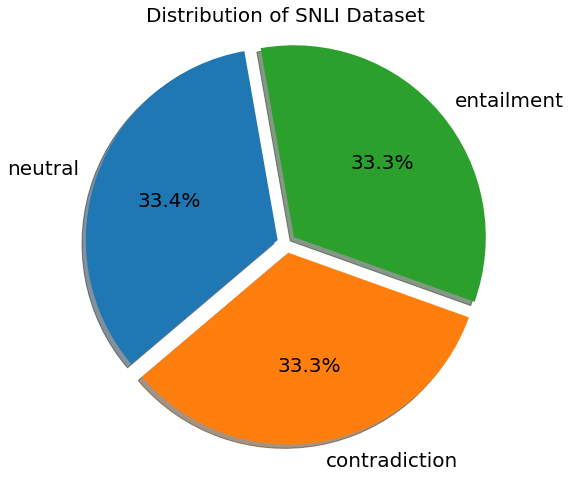

In [ ]:
similarity=[df.similarity.unique()[0],df.similarity.unique()[1],df.similarity.unique()[2]]
counts=[df.similarity.value_counts().entailment,df.similarity.value_counts().contradiction,df.similarity.value_counts().neutral]
explode = (0.05, 0.05, 0.05) 
fig = plt.figure(figsize =(8,8))
plt.pie(counts, explode=explode, labels=similarity,
autopct='%1.1f%%', shadow=True, startangle=100, textprops={'fontsize': 20,'color':"black"})
plt.title("Distribution of SNLI Dataset",  fontsize=20)
plt.axis('equal')
plt.savefig('pie_chart.png');
plt.show()


In [ ]:
df.describe()

,similarity,sentence1,sentence2
count,569027,569027,569027
unique,3,157387,495732
top,entailment,A dog in a field.,A man is sleeping.
freq,190111,33,343


In [ ]:
df.head()

,similarity,sentence1,sentence2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,neutral,Children smiling and waving at camera,They are smiling at their parents
4,entailment,Children smiling and waving at camera,There are children present


In [80]:
df_train.to_csv("df_train.csv")
df_val.to_csv("df_validation.csv")
df_test.to_csv("df_test.csv")
df_train_.to_csv("/content/drive/MyDrive/Success of AI Writers/DATA/df_train_.csv")